In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Truth Model
def a(t, w): # m/s^2
    return(10*np.sin(w*t))

def v(t, a, w, v_0): # m/s
    v = v_0 + (a/w)-(a/w)*np.cos(w*t)
    return(v)

def p(t, a, w, v_0, p_0):
    p = p_0 + (v_0 + (a/w))*t - (a/w**2)*np.sin(w*t)
    return(p)

# Accelerometer Model
def a_c(a, b, w):
    return(a + b + w)

def v_c(dt, v_c_0, a_c_0):
    return(v_c_0 + a_c_0 * dt)

def p_c(dt, p_c_0, v_c_0, a_c_0):
    return(p_c_0 + v_c_0*dt + a_c_0 * (dt**2)/2)

# Dynamic Model
# Same acceleration

def v_E(dt, v_E_0, a_0):
    return(v_E_0 + a_0 * dt)

def p_E(dt, p_E_0, v_E_0, a_0):
    return(p_E_0 + v_E_0*dt + a_0 * (dt**2)/2)





In [ ]:
w = 0.2 # rad/s
sample_rate = 200.0 # Hz
dt = 1.0/sample_rate
num_samples = int(30/dt) + 1
V = 0.0004 # (m/s^2)^2

b_a = np.random.normal(0, np.sqrt(0.01))
omega = np.random.normal(0, np.sqrt(V), num_samples)

p_mean_0 = 0.0
v_mean_0 = 100.0
M_p_0 = 10.0
M_v_0 = 1.0

v_0 = np.random.normal(v_mean_0, np.sqrt(M_v_0))
p_0 = np.random.normal(p_mean_0, np.sqrt(M_p_0))

[n1i, n2i] = np.random.normal(np.array([0, 0]).T, np.sqrt([[1, 0], [0, 0.04]]))
print(b_a)
print(n1i, n2i)

t = np.linspace(0, 30, num=int(30/dt) + 1, endpoint=True)
a_truth = a(t, w)
a_model = a_c(a_truth, b_a, omega)

v_truth = v(t, a_truth, w, v_0)
x_truth = p(t, a_truth, w, v_0, p_0)

-0.12113705874808137
[0.17441321 0.        ] [0.         0.28578989]


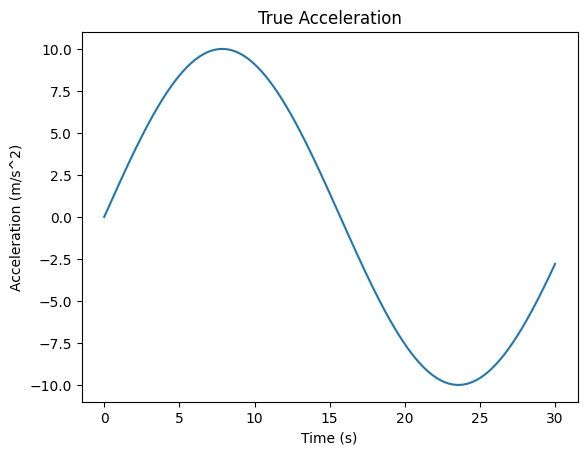

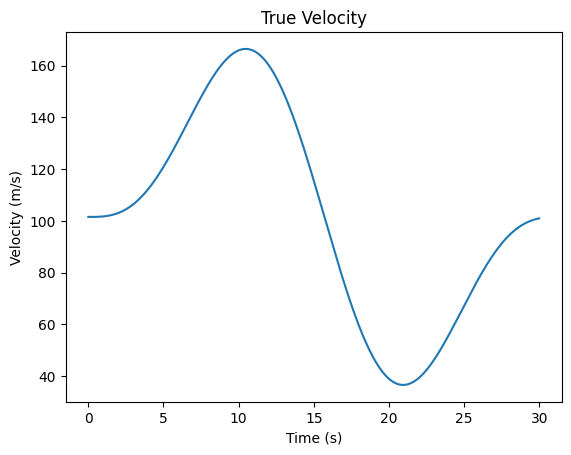

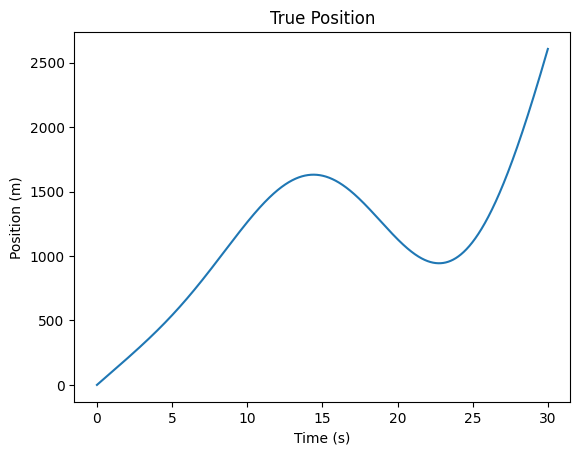

In [25]:
plt.figure()
plt.plot(t, a_truth)
# plt.plot(t, a_model)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("True Acceleration")
plt.show()

plt.figure()
plt.plot(t, v_truth)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("True Velocity")
plt.show()

plt.figure()
plt.plot(t, x_truth)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("True Position")
plt.show()




# Kalman Filter Equations

In [ ]:
def x_k1(phi_k, x_k):
    return(phi_k @ x_k)

def M_k1(phi_k, P_k, gamma_k, W_k):
    return(phi_k @ P_k @ phi_k.T + gamma_k @ W_k @ gamma_k.T)

def x_k(x_k_prop, P_k, H_k, V_k, z_k):
    return(x_k_prop + P_k @ H_k.T @ V_k.I * (z_k - H_k@x_k_prop))

def P_k(M_k, H_k, V_k):
    return((M_k.I + H_k.T @ V_k.I @ H_k).I)

In [ ]:
phi = np.array([[1, dt, -dt**2/2],
                [0, 1, -dt],
                [0, 0, 1]])

gamma = np.array([[dt**2/2, dt, 0]]).T